## XGBoost Regressor on Tips Dataset

In [1]:
#loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#Reading tips dataset into variable
tips=pd.read_csv('tips.csv')

In [11]:
#printing first five cols
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
#Extracitng the features
X=tips.drop('tip',axis=1)
y=tips['tip']

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   size        244 non-null    int64  
 3   sex_Male    244 non-null    uint8  
 4   smoker_Yes  244 non-null    uint8  
 5   day_Sat     244 non-null    uint8  
 6   day_Sun     244 non-null    uint8  
 7   day_Thur    244 non-null    uint8  
 8   time_Lunch  244 non-null    uint8  
dtypes: float64(2), int64(1), uint8(6)
memory usage: 7.3 KB


In [14]:
#Converting Categorical cols into numeric cols using Dummy encoding
X=pd.get_dummies(tips,drop_first=True)

In [17]:
X.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0
2,21.01,3.50,3,1,0,0,1,0,0
3,23.68,3.31,2,1,0,0,1,0,0
4,24.59,3.61,4,0,0,0,1,0,0


In [18]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=41,test_size=0.30)

In [21]:
#Scaling features
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(X_train)
x_test=ss.transform(X_test)

In [25]:
#Applying ALogrithm
from xgboost import XGBRegressor

In [83]:
xgbr=XGBRegressor(n_estimators=20,learning_rate=0.09)

In [84]:
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.09, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [85]:
y_pred=xgbr.predict(x_test)
y_pred

array([2.6661386, 3.0251715, 1.7692485, 4.308613 , 1.7692485, 3.0251715,
       1.9468609, 1.3085676, 2.8042498, 4.7115383, 2.3062062, 1.3419161,
       3.4604316, 4.860783 , 2.6163623, 1.6288484, 2.1784954, 2.6163623,
       3.684687 , 1.1966157, 1.7692485, 2.3704555, 4.308613 , 0.9317255,
       2.6163623, 3.2389448, 1.3085676, 3.4604316, 3.6258316, 3.0251715,
       1.3914678, 1.7692485, 1.3419161, 2.3062062, 1.9468609, 4.3730164,
       3.0106   , 3.4604316, 2.7228007, 2.5274458, 4.308613 , 3.0106   ,
       1.7692485, 1.4757876, 4.308613 , 1.7692485, 3.0251715, 2.4038465,
       1.7692485, 2.6163623, 1.9468609, 2.6163623, 2.7228007, 2.8608034,
       1.9170563, 1.7692485, 0.9317255, 3.684687 , 3.2389448, 2.6893094,
       2.6163623, 2.2528872, 3.4604316, 1.7692485, 3.0251715, 2.6661386,
       1.9468609, 2.1320639, 5.484872 , 2.1784954, 1.9468609, 1.7692485,
       3.0251715, 1.7692485], dtype=float32)

In [86]:
#checking accuracy of train set
xgbr.score(x_train,y_train)

0.8594491090740543

In [87]:
#checking accuracy of test set
xgbr.score(x_test,y_test)

0.8340747337381232

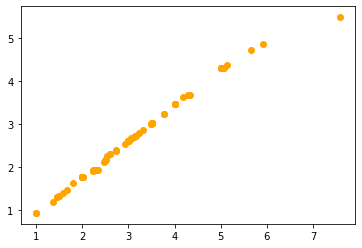

In [102]:
#plotting graph btw actual test values predicted test values
plt.scatter(y_test,y_pred,c='orange')

## XGBoost Classifier on Heart Disease Dataset# 

In [2]:
#Reading heart dataset into variable
heart=pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Extracting Features
X=heart.drop('target',axis=1)
y=heart['target']

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [16]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=21,test_size=0.33)

In [17]:
#Scaling the features
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_train=mms.fit_transform(X_train)
x_test=mms.transform(X_test)

In [18]:
#Applying model
from xgboost import XGBClassifier

In [123]:
xgbc=XGBClassifier(learning_rate=0.02,n_estimators=20,max_depth=2,gamma=2,min_child_weight=7)

In [124]:
xgbc.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=2,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [125]:
#Checking train set accuracy
xgbc.score(x_train,y_train)

0.8325123152709359

In [126]:
#Checking test set accuracy
xgbc.score(x_test,y_test)

0.81

In [127]:
y_pred=xgbc.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

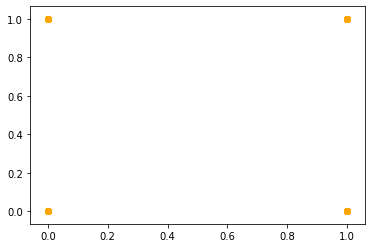

In [128]:
#plotting graph btw actual test values predicted test values
plt.scatter(y_test,y_pred,c='orange')